# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Signal detection theory
### VIDEO: ROC curves
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
## first, re-create the dp and rb matrices from previous lectures

x  = np.arange(.01,1,.01)
dp = np.tile(stats.norm.ppf(x),(99,1)).T - np.tile(stats.norm.ppf(x),(99,1))
rb = -( np.tile(stats.norm.ppf(x),(99,1)).T + np.tile(stats.norm.ppf(x),(99,1)) )/2

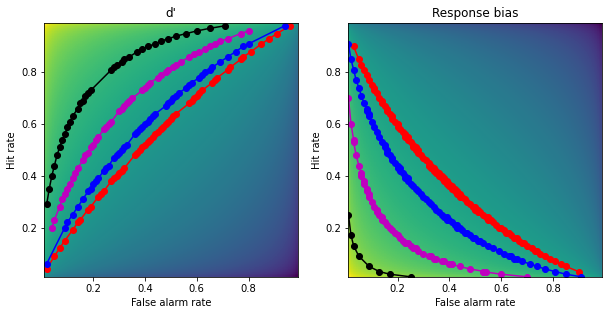

In [3]:
## create the 2D bias spaces and plot their ROC curves

rb2plot = [.3, .5, .9, 1.5] # d'/bias levels 
tol = .01 # tolerance for matching levels
colorz = 'rbmk'

# setup the figure
fig,ax = plt.subplots(1,2,figsize=(10,5))

# show the 2D spaces
ax[0].imshow(dp,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
ax[0].set_xlabel('False alarm rate')
ax[0].set_ylabel('Hit rate')
ax[0].set_title("d'")

ax[1].imshow(rb,extent=[x[0],x[-1],x[0],x[-1]],origin='lower')
ax[1].set_xlabel('False alarm rate')
ax[1].set_ylabel('Hit rate')
ax[1].set_title('Response bias')



### now draw the isocontours
for i in range(len(rb2plot)):
    
    # find d' points
    idx = np.where((dp>rb2plot[i]-tol) & (dp<rb2plot[i]+tol))
    ax[0].plot(x[idx[1]],x[idx[0]],'o-',color=colorz[i])
    
    # find bias points
    idx = np.where((rb>rb2plot[i]-tol) & (rb<rb2plot[i]+tol))
    ax[1].plot(x[idx[1]],x[idx[0]],'o-',color=colorz[i])


plt.show()